In [1]:
%matplotlib notebook

In [27]:
%matplotlib inline

In [2]:
from pylab import *
import numpy as np

#parameters are described at PARAMETERS.txt

r=2

bmin=7
smin=7

xlo=7; dx52=6;  ylo=9; dy52=3

#

xhi=xlo+dx52
yhi=ylo + dy52

#=============================

w=1850 #2000 #2250 #1800
h=950 #1300 #1400 #950

#

np.random.seed()      
p=0.5 #0.25 #0.16
a = (rand( h, w )<p) 

#=============================

###x11 = floor(linspace(xlo, xhi + 0.999, w))
###y11 = floor(linspace(yhi + 0.999 , ylo, h))
x11 = (linspace(xlo, xhi , w))
y11 = (linspace(yhi  , ylo, h))
xx, yy = meshgrid(x11, y11)
 
bmax=xx
smax=yy

#

niter = 100 #400 #200 #1000 #3000   
sleep1=    0 #0.3      #0.1 #0 #0.01
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
step2=60 #120 #1

bfade = True  # False
q = 0.1#0.9 #0.8#0.7 #0.3 #0.1 
###qqq=0.2 ###0 #0.5 #1#2 #4 #8 #1.8

#

afade = 0.1 * a
averyold = a 

diam = 2*r + 1


#execfile('backend_LtL_imshow.py')
#execfile('backend_LtL_pygame.py')


In [3]:
from scipy.ndimage import filters
import time

import matplotlib.pyplot as plt


In [4]:
#plt.ion()


In [5]:
#img_plot = plt.imshow(a)


In [6]:
#plt.show(block=False)


In [7]:
OR = logical_or
AND = logical_and

for i in range(niter):

    n41 =   diam*diam*filters.uniform_filter(0.0+a,diam )   ##,mode='wrap')  )  
    n=n41.round()   
    birth = AND(  n>=bmin,  AND( n<=bmax, logical_not(a) )  )
    survi = AND(  n>=smin,  AND( n<=smax, a )  )
    a =  OR( birth , survi )  
    if (i % step1)==0:

        if bfade:
            afade = q*a + (1-q)*afade
            asho=afade
        else:
            asho=0+a
            
        ada51= logical_xor(a, averyold)  
        averyold =a 
        
        #adaimage = transpose( ( ( asho)))
        #b = array(255*clip(adaimage,0,1),'B')

        #img_plot.set_data(asho)
        ###imshow(asho)
        ##show()
        #plt.draw()


        time.sleep(sleep1)

        if (i % step2)==0:
            am51=(0.0+a).mean()
            sam51='{:.3f}'.format(am51)
            dam51=ada51.mean()
            sdam51='{:.3f}'.format(dam51)
            print( i, sam51, sdam51)


            
#img_plot = plt.imshow(asho)


0 0.203 0.540
60 0.124 0.168


<IPython.core.display.Javascript object>


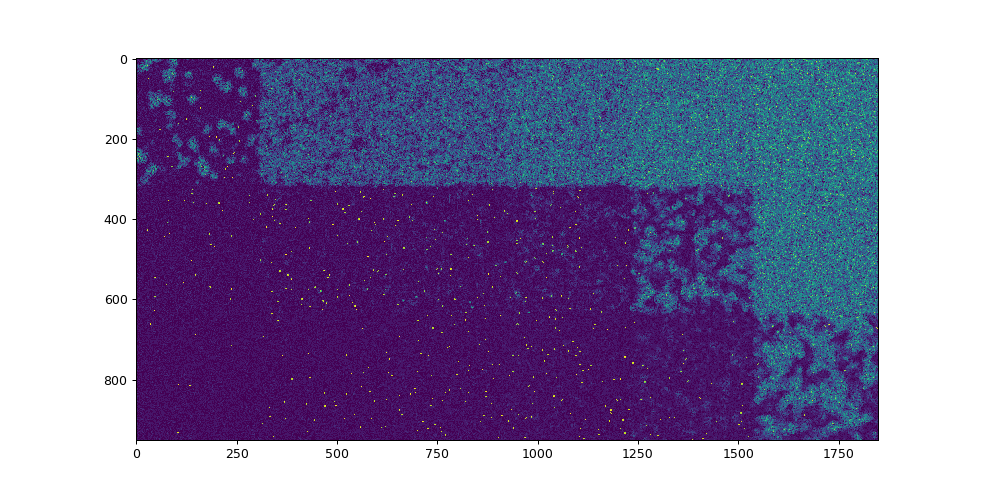

In [10]:
plt.figure(figsize = (11,5.5))
img_plot = plt.imshow(asho)

In [14]:
*int*?

In [15]:
int*?

In [8]:
%config

Available objects for config:
     ZMQInteractiveShell
     HistoryManager
     PrefilterManager
     IPCompleter
     DisplayFormatter
     MagicsManager
     ScriptMagics
     AliasManager
     IPKernelApp
     StoreMagics
     StoreMagics
     InlineBackend


In [29]:
%config InlineBackend.rc

{'figure.dpi': 72,
 'figure.edgecolor': (1, 1, 1, 0),
 'figure.facecolor': (1, 1, 1, 0),
 'figure.figsize': (6.0, 4.0),
 'figure.subplot.bottom': 0.125,
 'font.size': 10}

In [11]:
%config InlineBackend

InlineBackend options
-------------------
InlineBackend.close_figures=<Bool>
    Current: True
    Close all figures at the end of each cell.
    When True, ensures that each cell starts with no active figures, but it also
    means that one must keep track of references in order to edit or redraw
    figures in subsequent cells. This mode is ideal for the notebook, where
    residual plots from other cells might be surprising.
    When False, one must call figure() to create new figures. This means that
    gcf() and getfigs() can reference figures created in other cells, and the
    active figure can continue to be edited with pylab/pyplot methods that
    reference the current active figure. This mode facilitates iterative editing
    of figures, and behaves most consistently with other matplotlib backends,
    but figure barriers between cells must be explicit.
InlineBackend.figure_format=<Unicode>
    Current: ''
    The figure format to enable (deprecated use `figure_formats` ins

In [12]:
%config DisplayFormatter

DisplayFormatter options
----------------------
DisplayFormatter.active_types=<List>
    Current: ['text/plain', 'text/html', 'text/markdown', 'image/svg+xml', 'image/png', 'application/pdf', 'image/jpeg', 'text/latex', 'application/json', 'application/javascript']
    List of currently active mime-types to display. You can use this to set a
    white-list for formats to display.
    Most users will not need to change this value.


# PARAMETERS.txt

in most scripts

bmin is constant

bmax varies from xlo to xhi

smin is constant

smax varies from ylo to yhi


#bfade, q, qqq are purely visual ... not related to Cc of Golly



#=============================
#a standard rule notation

#https://www.conwaylife.com/wiki/Larger_than_Life

#Rr,Cc,M1,Ssmin..smax,Bbmin..bmax,Nn

#Rr specifies the range (r is from 1 to 500 in Golly and LifeViewer; 1 to 10 in MCell).

diam = 2*r + 1

#Cc specifies the number of states (c is from 0 to 255 in Golly, LifeViewer and MCell[note 1])

#Mm specifies if the middle cell is included in the neighborhood count (m is 0 or 1).

PyMartinCA uses M1 or weighted
M1 internally even for HROT 

#Ssmin..smax specifies the count limits for a state 1 cell to survive.

#Bbmin..bmax specifies the count limits for a dead cell to become a birth.

#Nn specifies the extended neighborhood type (n is M for Moore or N for von Neumann. Golly and LifeViewer also support C for Circular neighborhood)

PyMartinCA uses NM or weighted




###===================
###a historical note
#in legacy  source code, by Martin Novy
#slo==smin
#shi==smax
#blo==bmin
#bhi==bmax


###then there was a mass-rename 
###sed   --regexp-extended    -i.sedzalo22 's/\bblo\b/bmin/g' **.py
###sed   --regexp-extended    -i.sedza2 's/\bbhi\b/bmax/g' **.py
###sed   --regexp-extended    -i.sedza3 's/\bslo\b/smin/g' **.py
###sed   --regexp-extended    -i.sedza4 's/\bshi\b/smax/g' **.py
 
###sed   --regexp-extended    -i.sedz5 's/bfade, q, qqq may be related to Cc/parameters are described at PARAMETERS.txt/g' **.py
###sed ...


###===================
#PyMartinCA scripts originally evolved from
#http://nbviewer.ipython.org/github/martin12333/teaching-simso/blob/master/52-largerthanlife.ipynb
#https://github.com/thearn/game-of-life/blob/master/conway.py


{'figure.dpi': 72,
 'figure.edgecolor': (1, 1, 1, 0),
 'figure.facecolor': (1, 1, 1, 0),
 'figure.figsize': (6.0, 4.0),
 'figure.subplot.bottom': 0.125,
 'font.size': 10}

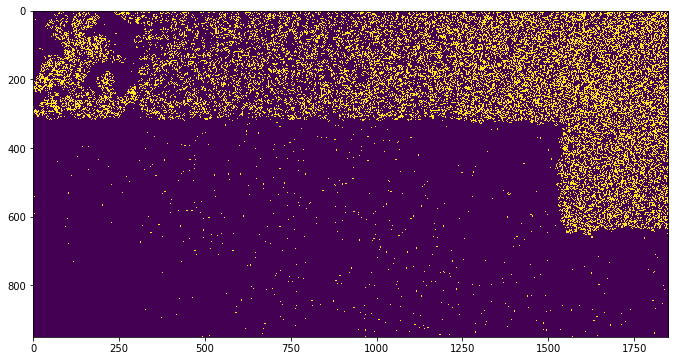